# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import math
import sklearn.preprocessing as pp
from sklearn.decomposition import PCA


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython import display

# magic word for producing visualizations in notebook
%matplotlib inline

### Run this to create final clustering model


### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

### Run this to create final clustering model

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!



## 1.1.2: Assessing NaN Values

I am interested to know the characteristics of the empty data -- the NaN values, before applying the missing value codes.
Specifically, to understand if the NaNs are randomly distributed, or if there are columns that are consistently empty.

**I will be performing 1.1.2 ahead of 1.1.1.**


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

(array([ 42.,   1.,   0.,   0.,   0.,   0.,   7.,   6.,  10.,   9.,   2.,
          7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0.  ,   11692.24,   23384.48,   35076.72,   46768.96,
          58461.2 ,   70153.44,   81845.68,   93537.92,  105230.16,
         116922.4 ,  128614.64,  140306.88,  151999.12,  163691.36,
         175383.6 ,  187075.84,  198768.08,  210460.32,  222152.56,
         233844.8 ,  245537.04,  257229.28,  268921.52,  280613.76,
         292306.  ,  303998.24,  315690.48,  327382.72,  339074.96,
         350767.2 ,  362459.44,  374151.68,  385843.92,  397536.16,
         409228.4 ,  420920.64,  432612.88,  444305.12,  455997.36,
         467689.6 ,  479381.84,  491074.08,  502766.32,  514458.56,
         526150.8 ,  537843.04,  549535.28,  5

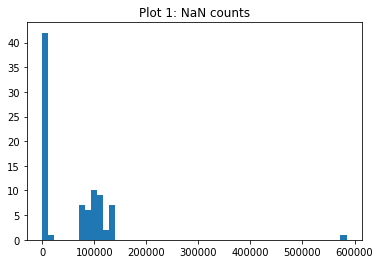

In [55]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

nullCounts = azdias.isnull().sum(axis = 0)

plt.title('Plot 1: NaN counts')
plt.hist(nullCounts, bins = 50)


In [4]:
# Investigate patterns in the amount of missing data in each column.

nullCols = {}

for col in azdias:
    number_nulls = azdias[col].isnull().sum()
    if number_nulls not in nullCols:
        nullCols[number_nulls] = []
    nullCols[number_nulls].append(col)
    
for key in nullCols:
    column_count = 0
    print(" ---- " + str(key) + " null values")
    for i in nullCols[key]:
        #print("   " + i)
        column_count = column_count + 1
    print ('[' + str(column_count) + ']' + ' columns found')

 ---- 0 null values
[32] columns found
 ---- 4854 null values
[10] columns found
 ---- 73499 null values
[6] columns found
 ---- 18348 null values
[1] columns found
 ---- 584612 null values
[1] columns found
 ---- 107602 null values
[1] columns found
 ---- 93148 null values
[5] columns found
 ---- 97008 null values
[1] columns found
 ---- 73969 null values
[1] columns found
 ---- 98979 null values
[3] columns found
 ---- 133324 null values
[7] columns found
 ---- 93740 null values
[3] columns found
 ---- 93155 null values
[1] columns found
 ---- 121196 null values
[2] columns found
 ---- 105800 null values
[1] columns found
 ---- 116515 null values
[7] columns found
 ---- 97216 null values
[3] columns found


Inspecting the data, columns have one of the following counts of NaN:
[0, 4854, 73499, 18348, 584612, 107602, 93148, 97008, 73969, 98979, 133324, 93740, 93155, 121196, 105800, 116515, 97216]

It would be useful to know how these are correlated.  I will use set operations to see how/if their membership varies.    

For each set $I$, $J$ where $|I| = |J|$ , examine whether the symmetric set difference $I \triangle J = \emptyset$  

In [7]:
nullRows = {}

print("Creating NaN row sets")
for col in azdias:
    nullRows[col] = set()
    index = 0
    for i in azdias[col]:
        if pd.isnull(i):
            nullRows[col].add(index)
        index = index + 1

print("Checking rows with equal number of NaNs")
for n in nullCols:
    if n != 0:
        allSame = True
        for i in nullCols[n]:
            for j in nullCols[n]:
                if i != j:
                    if len(nullRows[i].symmetric_difference(nullRows[j])) != 0:
                        allSame = False
                        print(i + "was not the same as" + j)
        if allSame:
            print("The columns with " + str(n) + " nulls were all the same")
            



Creating NaN row sets
Checking rows with equal number of NaNs
The columns with 4854 nulls were all the same
The columns with 73499 nulls were all the same
The columns with 18348 nulls were all the same
The columns with 584612 nulls were all the same
The columns with 107602 nulls were all the same
The columns with 93148 nulls were all the same
The columns with 97008 nulls were all the same
The columns with 73969 nulls were all the same
The columns with 98979 nulls were all the same
The columns with 133324 nulls were all the same
The columns with 93740 nulls were all the same
The columns with 93155 nulls were all the same
The columns with 121196 nulls were all the same
The columns with 105800 nulls were all the same
The columns with 116515 nulls were all the same
The columns with 97216 nulls were all the same


## 1.1.2 Discussion -- Assess NaN values in each column

Inspection of the histogram in plot 1 shows that counts of NaN data reappear quite frequently.  Of the 85 columns, there are 17 distinct counts of NaNs.  This is extremely unexpected if the NaNs were randomly distributed (where we would expect a binomial distribution), and strongly suggests the NaNs are at least partly correlated.

I performed more in-depth analysis as follows:
 - For each column with nonzero NaN values, create a set containing the row indices of each NaN value
 - For each I,J where NaN count of I = NaN count of J, compare the sets.
 - If the sets are not equal, print I and J
 - Otherwise, indicate all sets are equal
 
This analysis showed that for each column pair with the same NaN count, the NaNs all appeared in the same rows.

## Step 1.1.1: (Re)Assess NaNs - now accounting for Missing Value Codes
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [19]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [3]:
'''
Identify missing or unknown data values and convert them to NaNs.
1.  parse a collection of integers, X, or XX out of the string '[x,y,z...]'
1.  create mapping of feat_info['attribute'] -> feat_info['missing_or_unknown'] using dictionary
2.  apply a function replace(missing[attribute], NaN) to each row
'''
missing_data_codes = {}
'''
for curr_row in feat_info.iterrows():
    #parse the integers or X or XX
    #note that the missing or error values are all -1, 0, 9, X, or XX
    #I am just going to search the string for these character patterns, admitting this is a bad implmentation that does not generalize 
    missing_data_codes[curr_row[1][0]] = []
    if '-1' in curr_row[1][3]:
        missing_data_codes[curr_row[1][0]].append(-1)
    if '0' in curr_row[1][3]:
        missing_data_codes[curr_row[1][0]].append(0)
    if '9' in curr_row[1][3]:
        missing_data_codes[curr_row[1][0]].append(9)
    if 'XX' in curr_row[1][3]:
        missing_data_codes[curr_row[1][0]].append('XX')
    elif 'X' in curr_row[1][3]:
        missing_data_codes[curr_row[1][0]].append('X')
    
    #print(curr_row[1][0] + " : " + ','.join(missing_data_codes[curr_row[1][0]]))
'''

#Reference: this revised code was recommended by reviewer
for index, row in feat_info.iterrows():
    attrib_name = row['attribute']
    data = azdias[attrib_name]

    if row['missing_or_unknown'] != '[]':
        miss_codes = row['missing_or_unknown'][1:-1].split(',')
    else:
        miss_codes = []
    if miss_codes:
        print(attrib_name + " : " + ','.join(miss_codes))
        for code in miss_codes:
            # try-except block to capture 'X' and 'XX' codes
            try:
                data = data.replace([int(code)], np.nan)
            except:
                data = data.replace([code], np.nan)

    azdias[attrib_name] = data

### Run this to create final clustering model
    

AGER_TYP : -1,0
ALTERSKATEGORIE_GROB : -1,0,9
ANREDE_KZ : -1,0
CJT_GESAMTTYP : 0
FINANZ_MINIMALIST : -1
FINANZ_SPARER : -1
FINANZ_VORSORGER : -1
FINANZ_ANLEGER : -1
FINANZ_UNAUFFAELLIGER : -1
FINANZ_HAUSBAUER : -1
FINANZTYP : -1
GEBURTSJAHR : 0
HEALTH_TYP : -1,0
LP_LEBENSPHASE_FEIN : 0
LP_LEBENSPHASE_GROB : 0
LP_FAMILIE_FEIN : 0
LP_FAMILIE_GROB : 0
LP_STATUS_FEIN : 0
LP_STATUS_GROB : 0
NATIONALITAET_KZ : -1,0
PRAEGENDE_JUGENDJAHRE : -1,0
RETOURTYP_BK_S : 0
SEMIO_SOZ : -1,9
SEMIO_FAM : -1,9
SEMIO_REL : -1,9
SEMIO_MAT : -1,9
SEMIO_VERT : -1,9
SEMIO_LUST : -1,9
SEMIO_ERL : -1,9
SEMIO_KULT : -1,9
SEMIO_RAT : -1,9
SEMIO_KRIT : -1,9
SEMIO_DOM : -1,9
SEMIO_KAEM : -1,9
SEMIO_PFLICHT : -1,9
SEMIO_TRADV : -1,9
SHOPPER_TYP : -1
SOHO_KZ : -1
TITEL_KZ : -1,0
VERS_TYP : -1
ZABEOTYP : -1,9
ALTER_HH : 0
HH_EINKOMMEN_SCORE : -1,0
KK_KUNDENTYP : -1
W_KEIT_KIND_HH : -1,0
WOHNDAUER_2008 : -1,0
ANZ_HAUSHALTE_AKTIV : 0
GEBAEUDETYP : -1,0
MIN_GEBAEUDEJAHR : 0
OST_WEST_KZ : -1
WOHNLAGE : -1
CAMEO_DEUG_2015 : 

In [57]:
# replace the text with NaN

#for col in azdias:
#    azdias[col].replace(to_replace=missing_data_codes[col], value=None, inplace=True)

#test the results: expect a NaN instead of -1 now
azdias.head(5)
    
### Run this to create final clustering model

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


Text(0.5,0,'prop. of missing values')

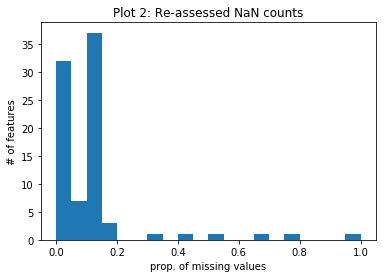

In [6]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

column_nans = azdias.isnull().mean()
plt.title('Plot 2: Re-assessed NaN counts')
plt.hist(column_nans, bins = np.arange(0,1+.05,.05))
plt.ylabel('# of features')
plt.xlabel('prop. of missing values')

#plt.hist(nullCounts, bins = 50)

(array([ 31.,   1.,   0.,   0.,   7.,  19.,  12.,   6.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0.  ,   17781.22,   35562.44,   53343.66,   71124.88,
          88906.1 ,  106687.32,  124468.54,  142249.76,  160030.98,
         177812.2 ,  195593.42,  213374.64,  231155.86,  248937.08,
         266718.3 ,  284499.52,  302280.74,  320061.96,  337843.18,
         355624.4 ,  373405.62,  391186.84,  408968.06,  426749.28,
         444530.5 ,  462311.72,  480092.94,  497874.16,  515655.38,
         533436.6 ,  551217.82,  568999.04,  586780.26,  604561.48,
         622342.7 ,  640123.92,  657905.14,  675686.36,  693467.58,
         711248.8 ,  729030.02,  746811.24,  764592.46,  782373.68,
         800154.9 ,  817936.12,  835717.34,  8

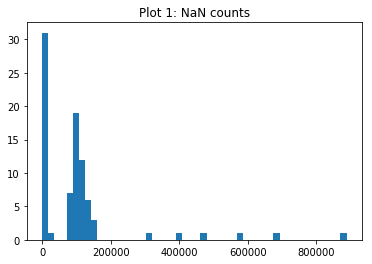

In [7]:
nullCounts = azdias.isnull().sum(axis = 0)

plt.title('Plot 1: NaN counts')
plt.hist(nullCounts, bins = 50)

This histogram clearly has a different distribution than before.  A pattern of outliers has emerged, where columns with NaN count > ~190k seem to be problematic.  Here is a look at which columns they are:

In [8]:
for col in azdias:
    null_count = azdias[col].isnull().sum(axis = 0)
    if null_count > 190000:
        print(col + " has " + str(null_count) + " NaNs.")

AGER_TYP has 685843 NaNs.
GEBURTSJAHR has 392318 NaNs.
TITEL_KZ has 889061 NaNs.
ALTER_HH has 310267 NaNs.
KK_KUNDENTYP has 584612 NaNs.
KBA05_BAUMAX has 476524 NaNs.


At this point it is useful to look back at the subject-matter domain.  Here are the descriptions of the columns from the data dictionary:

1.1. AGER_TYP
Best-ager typology
- -1: unknown
-  0: no classification possible
-  1: passive elderly
-  2: cultural elderly
-  3: experience-driven elderly

1.7. GEBURTSJAHR
Year of birth
- missing data encoded as 0

2.1. ALTER_HH
Birthdate of head of household
-  0: unknown / no main age detectable
-  1: 1895-01-01 to 1899-12-31
-  2: 1900-01-01 to 1904-12-31
-  3: 1905-01-01 to 1909-12-31
-  4: 1910-01-01 to 1914-12-31
-  5: 1915-01-01 to 1919-12-31
-  6: 1920-01-01 to 1924-12-31
-  7: 1925-01-01 to 1929-12-31
-  8: 1930-01-01 to 1934-12-31
-  9: 1935-01-01 to 1939-12-31
- 10: 1940-01-01 to 1944-12-31
- 11: 1945-01-01 to 1949-12-31
- 12: 1950-01-01 to 1954-12-31
- 13: 1955-01-01 to 1959-12-31
- 14: 1960-01-01 to 1964-12-31
- 15: 1965-01-01 to 1969-12-31
- 16: 1970-01-01 to 1974-12-31
- 17: 1975-01-01 to 1979-12-31
- 18: 1980-01-01 to 1984-12-31
- 19: 1985-01-01 to 1989-12-31
- 20: 1990-01-01 to 1994-12-31
- 21: 1995-01-01 to 1999-12-31

1.23. TITEL_KZ
Academic title flag
- -1: unknown
-  0: unknown
-  1: Dr.
-  2: Dr. Dr.
-  3: Prof.
-  4: Prof. Dr.
-  5: other

2.5. KK_KUNDENTYP
Consumer pattern over past 12 months
- -1: unknown
-  1: regular customer
-  2: active customer
-  3: new costumer
-  4: stray customer
-  5: inactive customer
-  6: passive customer

5.5. KBA05_BAUMAX
Most common building type within the microcell
- -1: unknown
-  0: unknown
-  1: mainly 1-2 family homes in the microcell
-  2: mainly 3-5 family homes in the microcell
-  3: mainly 6-10 family homes in the microcell
-  4: mainly 10+ family homes in the microcell
-  5: mainly business buildings in the microcell

It is clear why TITEL_KZ and AGER_TYP have so many missing data valuse -- the features apply only to academic and elderly segments of the population respectively, and I have no problems with dropping either.

KK_KUNDENTYP on the other hand sounds like it would be very informative for a customer segment.  If this were a real-life application, I would be tempted to re-encode all missing data values as 'regular customer' and evaluate.  However, for this exercise I will be removing it.

For both of the two date-of-birth attributes, the unavailability is regreattable; however, the person's age can be estmimated from other values (such as decade of youth movement).

I don't really understand what a 'microcell' is - maybe a city block?  There are many other attributes that give information about the person's neighborhood and I am not concnerned about dropping this attribute.

In [4]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

#I am considering the column with >200k missing entries to be the "outlier" -- the lowest outlier was KBA05_BAUMAX with 208k

#make a copy of the dataframe for posterity
azdias_copy = azdias.copy()

for col in azdias:
    if azdias[col].isnull().sum() > 200000:
        azdias.drop(col, axis=1)

### Run this to create final clustering model


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [5]:
# How much data is missing in each row of the dataset?
azdias['missingVals'] = azdias.isnull().sum(axis=1)

### Run this to create final clustering model


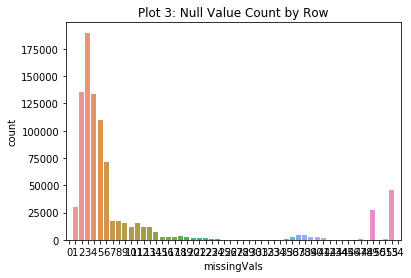

In [11]:
plt.title('Plot 3: Null Value Count by Row')
sns.countplot(azdias['missingVals'])

#### Discussion 1.1.3: Assess Missing Data in Each Row

An inspection of the data illustrated by Plot 3 suggests a main population with mean around three missing columns.  The maxima at 11 and 18 suggest there may be separate populations with mean values at those column counts, but the main population should be considered to extend to at least 12 rows, which I wil lbe usingas the upper bound for removing rows. 

I have arbitrarily selected the following columns to compare:
 - FINANZ_HAUSBAUER
 - PRAEGENDE_JUGENDJAHRE
 - SEMIO_MAT
 - VERS_TYP
 - ZABEOTYP
 - LP_LEBENSPHASE_GROB
 - ONLINE_AFFINITAET

The first five had no null values (excluding unknown data codes), and the last two had 4854.

In [6]:
#separate data into two populations

azdias['population'] = azdias.apply(lambda row: row['missingVals'] < 12,axis=1)
azdias_main = azdias[azdias["population"] == True]
azdias_outliers = azdias[azdias["population"] == False]

### Run this to create final clustering model

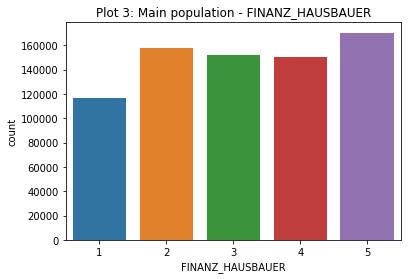

In [13]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

plt.title('Plot 3: Main population - FINANZ_HAUSBAUER')
sns.countplot(azdias_main['FINANZ_HAUSBAUER'])

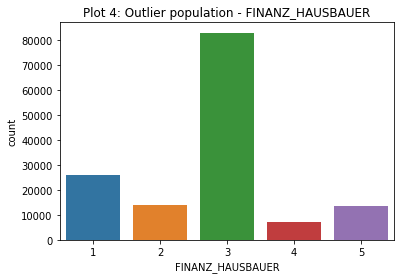

In [14]:
plt.title('Plot 4: Outlier population - FINANZ_HAUSBAUER')
sns.countplot(azdias_outliers['FINANZ_HAUSBAUER'])

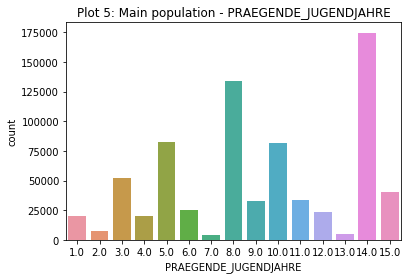

In [15]:
plt.title('Plot 5: Main population - PRAEGENDE_JUGENDJAHRE')
sns.countplot(azdias_main['PRAEGENDE_JUGENDJAHRE'])

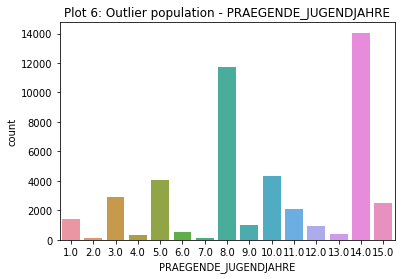

In [17]:
plt.title('Plot 6: Outlier population - PRAEGENDE_JUGENDJAHRE')
sns.countplot(azdias_outliers['PRAEGENDE_JUGENDJAHRE'])

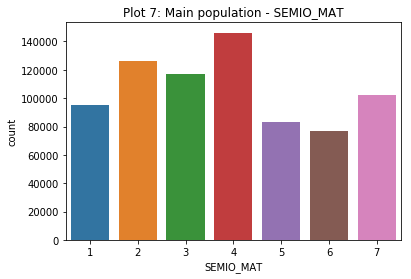

In [18]:
plt.title('Plot 7: Main population - SEMIO_MAT')
sns.countplot(azdias_main['SEMIO_MAT'])

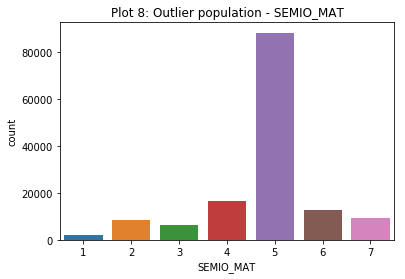

In [19]:
plt.title('Plot 8: Outlier population - SEMIO_MAT')
sns.countplot(azdias_outliers['SEMIO_MAT'])

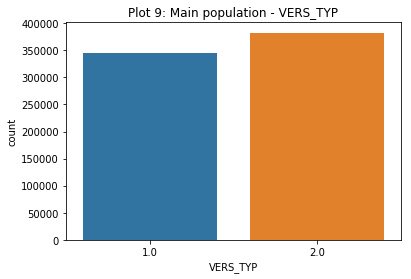

In [20]:
plt.title('Plot 9: Main population - VERS_TYP')
sns.countplot(azdias_main['VERS_TYP'])

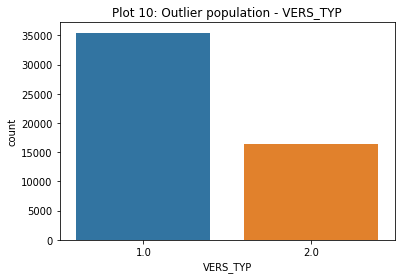

In [21]:
plt.title('Plot 10: Outlier population - VERS_TYP')
sns.countplot(azdias_outliers['VERS_TYP'])

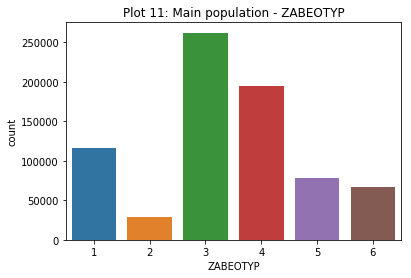

In [22]:
plt.title('Plot 11: Main population - ZABEOTYP')
sns.countplot(azdias_main['ZABEOTYP'])

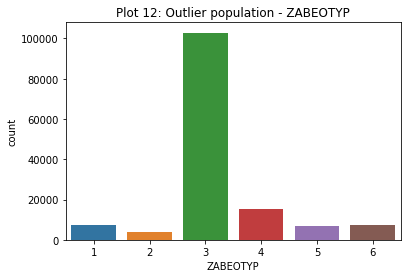

In [23]:
plt.title('Plot 12: Outlier population - ZABEOTYP')
sns.countplot(azdias_outliers['ZABEOTYP'])

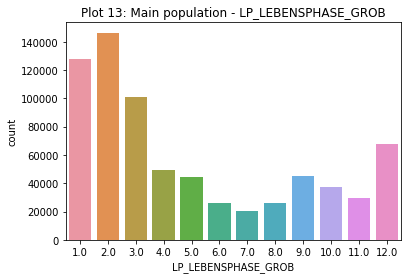

In [24]:
plt.title('Plot 13: Main population - LP_LEBENSPHASE_GROB')
sns.countplot(azdias_main['LP_LEBENSPHASE_GROB'])

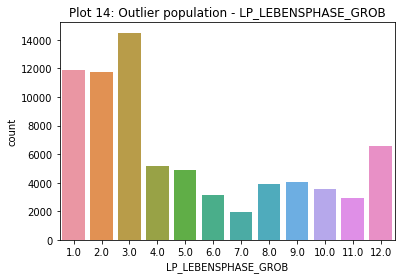

In [25]:
plt.title('Plot 14: Outlier population - LP_LEBENSPHASE_GROB')
sns.countplot(azdias_outliers['LP_LEBENSPHASE_GROB'])

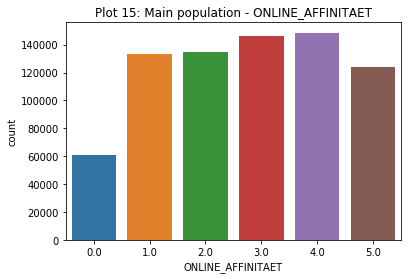

In [26]:
plt.title('Plot 15: Main population - ONLINE_AFFINITAET')
sns.countplot(azdias_main['ONLINE_AFFINITAET'])

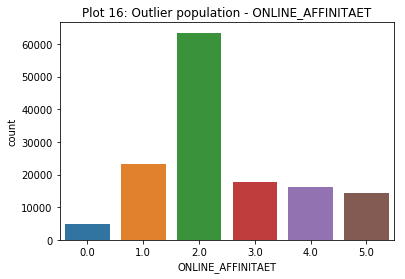

In [27]:
plt.title('Plot 16: Outlier population - ONLINE_AFFINITAET')
sns.countplot(azdias_outliers['ONLINE_AFFINITAET'])

## Discussion:

A comparison of the distribution of values in the main population versus the outlier population shows significant differences in at least some columns.  Good examples include ZABEOTYP, SEMIO_MAT, and ONLINE_AFFINITAET:

1.25. ZABEOTYP
Energy consumption typology
- -1: unknown
-  1: green
-  2: smart
-  3: fair supplied
-  4: price driven
-  5: seeking orientation
-  6: indifferent
-  9: unknown

3: "fair supplied" was a clear majority in the outliers and was close to even in the main population

1.20. SEMIO_MAT (- MAT: materialistic)

Personality typology, for each dimension:
- -1: unknown
-  1: highest affinity
-  2: very high affinity
-  3: high affinity
-  4: average affinity
-  5: low affinity
-  6: very low affinity
-  7: lowest affinity
-  9: unknown

2, 3, and 4 were the most frequently represented in the main population, while 5 was the clear majority in the outliers. 


7.4. ONLINE_AFFINITAET
Online affinity
- 0: none
- 1: low
- 2: middle
- 3: high
- 4: very high
- 5: highest

This feature peaked sharply for the outliers at "middle" and was even for the main population

Analysis of the two populations shows that there are consequences to dropping rows.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

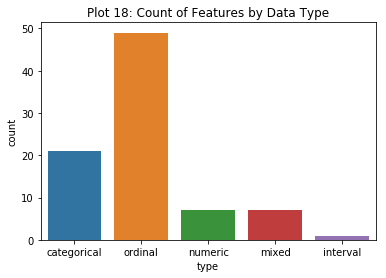

In [28]:
# How many features are there of each data type?

plt.title('Plot 18: Count of Features by Data Type')
sns.countplot(feat_info['type'])


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [29]:
feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]


Assess categorical variables: which are binary, which are multi-level, and
which one needs to be re-encoded?

| Categorical feature  | Level | Re-encode? | 
| ------------- |:-------------:| -----:|
| AGER_TYP    | multi-level  | no - dropped in 1.1.2 |
| ANREDE_KZ      | binary      | no |
| CJT_GESAMTTYP | multi-level  | yes |
| FINANZTYP      | multi-level | yes |
| GFK_URLAUBERTYP      | multi-level | yes |
| GREEN_AVANTGARDE | binary  | no |
| LP_FAMILIE_FEIN      | multi-level | yes |
| LP_FAMILIE_GROB      | multi-level | drop |
| LP_STATUS_FEIN	 | multi-level  | yes |
| LP_STATUS_GROB	      | multi-level | drop |
| NATIONALITAET_KZ      | multi-level | yes |
| SHOPPER_TYP	 | multi-level  | yes |
| SOHO_KZ      | binary | no |
| TITEL_KZ      | multi-level | no - dropped in 1.1.2 |
| VERS_TYP | binary | no |
| ZABEOTYP      | multi-level | yes |
| KK_KUNDENTYP      | multi-level | no - dropped in 1.1.2 |
| GEBAEUDETYP | multi-level | yes |
| OST_WEST_KZ      | binary | as numeric |
| CAMEO_DEUG_2015      | multi-level | drop |
| CAMEO_DEU_2015 | multi-level | yes |



In [7]:
azdias_main['num_OST_WEST_KZ'] = azdias_main['OST_WEST_KZ'].apply(lambda x: 1 if x == 'W' else 0)

multi_level = [ 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN',
               'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',  'CAMEO_DEU_2015']
azdias_main = pd.get_dummies(azdias_main, columns = multi_level, prefix = multi_level)

### Run this to create final clustering model

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
azdias_main.head(5)



,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GEBURTSJAHR,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,NaN,1.0,2,1,5,2,5,4,5,1996.0,...,0,1,0,0,0,0,0,0,0,0
2,NaN,3.0,2,1,4,1,2,3,5,1979.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,4.0,2,4,2,5,2,1,2,1957.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,3.0,1,4,3,4,1,3,2,1963.0,...,0,0,0,0,0,0,0,0,0,0
5,3.0,1.0,2,3,1,5,2,2,5,1943.0,...,0,0,0,1,0,0,0,0,0,0


#### Discussion 1.2.1: Re-Encode Categorical Features

I encoded the OST_WEST_KZ binary attribute as 0 or 1.  

Inspection of the data dictionary shows that the attributes CAMEO_DEUG_2015, LP_STATUS_GROB, LP_FAMILIE_GROB are generalized versions of the CAMEO_DEU_2015, LP_STATUS_FIEN, and LP_FAMILIE_FEIN attributes.  Since these attributes are redundant and less informative, I dropped them at this stage.

AGER_TYP, TITEL_KZ, and KK_KUNDENTYP have already been designated to be dropped as a result of the missing column data analysis.

I one-hot encoded the remaining categorical attributes.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [8]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

###Decade
'''
1 = 40s
2 = 50s
3 = 60s
4 = 70s
5 = 80s
6 = 90s
'''
decades = dict([(1,1), (2,1), (3,2), (4,2), (5,3), (6,3), (7,3), (8,4), (9,4), (10,5), (11,5), (12,5), (13,5), (14,6), (15,6)])

###Movement type
'''
0 = Mainstream
1 = Avantgarde
'''
movements = dict([(1,0), (2,1), (3,0), (4,1), (5,0), (6,1), (7,1), (8,0), (9,1), (10,0), (11,1), (12,0), (13,1), (14,0), (15,1)])

azdias_main['PRAEGENDE_JUGENDJAHRE_decade'] = azdias_main['PRAEGENDE_JUGENDJAHRE'].map(decades)
azdias_main['PRAEGENDE_JUGENDJAHRE_mov'] = azdias_main['PRAEGENDE_JUGENDJAHRE'].map(movements)

### Run this to create final clustering model


In [9]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

##Wealth
'''
1 = Wealthy Households
2 = Prosperous Households
3 = Comfortable Households
4 = Less Affluent Households
5 = Poorer Households
'''
##Family type
'''
1 = Pre-Family Couples & Singles
2 = Young Couples With Children
3 = Families With School Age Children
4 = Older Families &  Mature Couples
5 = Wealthy Households - Elders In Retirement
'''

##these values can be obtained arithmetically
azdias_main['CAMEO_INTL_2015_wealth'] = azdias_main['CAMEO_INTL_2015'].apply(lambda x: np.nan if pd.isnull(x) else divmod(int(x), 10)[1])
azdias_main['CAMEO_INTL_2015_family'] = azdias_main['CAMEO_INTL_2015'].apply(lambda x: np.nan if pd.isnull(x) else int(x) // 10)

### Run this to create final clustering model

In [10]:
# Investigate "WOHNLAGE" and de-couple rural-urban data from neighborhood wealth data

#Reference: based on reviewer feedback

azdias_main['WOHNLAGE'] = azdias_main['WOHNLAGE'].apply(lambda x: np.nan if (x == 7 or x ==8) else x )

### Run this to create final clustering model

In [33]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


#### Discussion 1.2.2: Engineer Mixed-Type Features

I have decided to drop the attributes 'LP_LEBENSPHASE_FEIN' and 'LP_LEBENSPHASE_GROB' -- an inspection of the data dictionary shows that values of these attributes is already captured in 'CAMEO_INTL_2015_wealth'.

I have replaced 7 and 8 in WOHNLAGE with np.nan.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [11]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

azdias_final = azdias_main.copy()
cols_to_drop = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE', 
                'CAMEO_DEUG_2015', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'OST_WEST_KZ',                  
                'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'missingVals', 'population',
               'AGER_TYP', 'GEBURTSJAHR', 'ALTER_HH']
               

'''
'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'NATIONALITAET_KZ',
'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',  'CAMEO_DEU_2015',
'''
azdias_final.drop(cols_to_drop, axis=1, inplace=True)

### Run this to create final clustering model

In [12]:
for col in azdias_final:
    print(col)

ALTERSKATEGORIE_GROB
ANREDE_KZ
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_VORSORGER
FINANZ_ANLEGER
FINANZ_UNAUFFAELLIGER
FINANZ_HAUSBAUER
GREEN_AVANTGARDE
HEALTH_TYP
RETOURTYP_BK_S
SEMIO_SOZ
SEMIO_FAM
SEMIO_REL
SEMIO_MAT
SEMIO_VERT
SEMIO_LUST
SEMIO_ERL
SEMIO_KULT
SEMIO_RAT
SEMIO_KRIT
SEMIO_DOM
SEMIO_KAEM
SEMIO_PFLICHT
SEMIO_TRADV
SOHO_KZ
VERS_TYP
ANZ_PERSONEN
ANZ_TITEL
HH_EINKOMMEN_SCORE
W_KEIT_KIND_HH
WOHNDAUER_2008
ANZ_HAUSHALTE_AKTIV
ANZ_HH_TITEL
KONSUMNAEHE
MIN_GEBAEUDEJAHR
WOHNLAGE
KBA05_ANTG1
KBA05_ANTG2
KBA05_ANTG3
KBA05_ANTG4
KBA05_GBZ
BALLRAUM
EWDICHTE
INNENSTADT
GEBAEUDETYP_RASTER
KKK
MOBI_REGIO
ONLINE_AFFINITAET
REGIOTYP
KBA13_ANZAHL_PKW
PLZ8_ANTG1
PLZ8_ANTG2
PLZ8_ANTG3
PLZ8_ANTG4
PLZ8_BAUMAX
PLZ8_HHZ
PLZ8_GBZ
ARBEIT
ORTSGR_KLS9
RELAT_AB
num_OST_WEST_KZ
CJT_GESAMTTYP_1.0
CJT_GESAMTTYP_2.0
CJT_GESAMTTYP_3.0
CJT_GESAMTTYP_4.0
CJT_GESAMTTYP_5.0
CJT_GESAMTTYP_6.0
FINANZTYP_1
FINANZTYP_2
FINANZTYP_3
FINANZTYP_4
FINANZTYP_5
FINANZTYP_6
GFK_URLAUBERTYP_1.0
GFK_URLAUBERTYP_2.0
GFK_URLAU

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [13]:
"""
clean_data(df, inplace = False)

Perform feature trimming, re-encoding, and engineering for demographics
data

INPUT: Demographics DataFrame, inplace = true cleans a frame in place; false returns a new, cleaned frame
OUTPUT: Trimmed and cleaned demographics DataFrame
"""
def clean_data(df, inplace = False):
    frame = df

    #create a dictionary of missing value codes
    #load the feature summary file
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')
    
    for index, row in feat_info.iterrows():
        attrib_name = row['attribute']
        data = frame[attrib_name]

        if row['missing_or_unknown'] != '[]':
            miss_codes = row['missing_or_unknown'][1:-1].split(',')
        else:
            miss_codes = []
        if miss_codes:
            #print(attrib_name + " : " + ','.join(miss_codes))
            for code in miss_codes:
                # try-except block to capture 'X' and 'XX' codes
                try:
                    data = data.replace([int(code)], np.nan)
                except:
                    data = data.replace([code], np.nan)

        frame[attrib_name] = data

    #drop the columns found to have excessive NaNs in the Azdias set
    nan_cols = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'ALTER_HH']
    frame.drop(nan_cols, axis=1)

    #count the NaNs by row
    frame['missingVals'] = frame.isnull().sum(axis=1)
    frame['population'] = frame.apply(lambda row: row['missingVals'] < 12,axis=1)
    frame_main = frame[frame["population"] == True]
    frame_outliers = frame[frame["population"] == False]

    #re-engineer 'OST_WEST_KZ'
    frame_main['num_OST_WEST_KZ'] = frame_main['OST_WEST_KZ'].apply(lambda x: 1 if x == 'W' else 0)

    #one-hot encode the following multi-level features
    multi_level = [ 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN',
               'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',  'CAMEO_DEU_2015']
    frame_main = pd.get_dummies(frame_main, columns = multi_level, prefix = multi_level)

    #re-engineer 'PRAEGENDE_JUGENDJAHRE'
    ###Decade
    '''
    1 = 40s
    2 = 50s
    3 = 60s
    4 = 70s
    5 = 80s
    6 = 90s
    '''
    decades = dict([(1,1), (2,1), (3,2), (4,2), (5,3), (6,3), (7,3), (8,4), (9,4), (10,5), (11,5), (12,5), (13,5), (14,6), (15,6)])

    ###Movement type
    '''
    0 = Mainstream
    1 = Avantgarde
    '''
    movements = dict([(1,0), (2,1), (3,0), (4,1), (5,0), (6,1), (7,1), (8,0), (9,1), (10,0), (11,1), (12,0), (13,1), (14,0), (15,1)])

    frame_main['PRAEGENDE_JUGENDJAHRE_decade'] = frame_main['PRAEGENDE_JUGENDJAHRE'].map(decades)
    frame_main['PRAEGENDE_JUGENDJAHRE_mov'] = frame_main['PRAEGENDE_JUGENDJAHRE'].map(movements)


    # Re-rengineer 'CAMEO_INTL_2015' 

    ##Wealth
    '''
    1 = Wealthy Households
    2 = Prosperous Households
    3 = Comfortable Households
    4 = Less Affluent Households
    5 = Poorer Households
    '''
    ##Family type
    '''
    1 = Pre-Family Couples & Singles
    2 = Young Couples With Children
    3 = Families With School Age Children
    4 = Older Families &  Mature Couples
    5 = Wealthy Households - Elders In Retirement
    '''
    frame_main['CAMEO_INTL_2015_wealth'] = frame_main['CAMEO_INTL_2015'].apply(lambda x: np.nan if pd.isnull(x) else divmod(int(x), 10)[1])
    frame_main['CAMEO_INTL_2015_family'] = frame_main['CAMEO_INTL_2015'].apply(lambda x: np.nan if pd.isnull(x) else int(x) // 10)

    frame_main['WOHNLAGE'] = frame_main['WOHNLAGE'].apply(lambda x: np.nan if (x == 7 or x ==8) else x )
    
    frame_final = frame_main.copy()
    cols_to_drop = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'CAMEO_INTL_2015', 'PRAEGENDE_JUGENDJAHRE', 
                'CAMEO_DEUG_2015', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'OST_WEST_KZ',                  
                'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'missingVals', 'population',
               'AGER_TYP', 'GEBURTSJAHR', 'ALTER_HH']

    frame_final.drop(cols_to_drop, axis=1, inplace=True)

    frame = frame_final

    if not inplace:
        return frame
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [14]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
imputer = pp.Imputer(missing_values=np.nan, axis=0)

#keep a copy in a dataframe
azdias_final2 = azdias_final.copy()
azdias_final = imputer.fit_transform(azdias_final)

### Run this to create final clustering model

In [15]:
# Apply feature scaling to the general population demographics data.
scaler = pp.StandardScaler()
azdias_final = scaler.fit_transform(azdias_final)

### Run this to create final clustering model

### Discussion 2.1: Apply Feature Scaling

I have used the sklearn StandardScaler class to remove the mean of all features, and to set the variance to unity.
The purpose of the feature scaling is to avoid situations where one feature has an abnormally large range of values.
If this occurs, distance calculations will weight the large-ranged feature ofver others and disrtort the clustering.


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [16]:
# Apply PCA to the data.
pca = PCA(n_components=None)
azdias_pca = pca.fit(azdias_final)

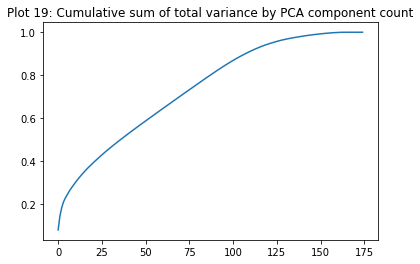

In [17]:
# Investigate the variance accounted for by each principal component.

evr_sum = 0
evr_curve = []
for i in azdias_pca.explained_variance_ratio_:
    evr_sum = evr_sum + i
    evr_curve.append(evr_sum)
plt.title('Plot 19: Cumulative sum of total variance by PCA component count')    
plt.plot(evr_curve)


### Discussion on Principal Components

Visually inspecting the curve, there appears to be steady information gain until around 125 or so principal components.  After this, the curve is quite flat.  This corresponds to ~90% or the EVR.  I will cut the number of principal components off at 90% of the EVR as determined below:

In [18]:
evr_sum2 = 0
evr_index = 0
for i in azdias_pca.explained_variance_ratio_:
    evr_sum2 = evr_sum2 + i
    evr_index = evr_index + 1
    if evr_sum2 > 0.9:
        break

print("90% of EVR is contained in the first " + str(evr_index) + " principal components")

90% of EVR is contained in the first 108 principal components


For this reason, I am selecting 108 principal components.

In [19]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=108)

azdias_tran = pca.fit_transform(azdias_final)
azdias_pca = pca.fit(azdias_final)
### Run this to create final clustering model

### Discussion 2.2: Perform Dimensionality Reduction

I have completed dimensionality reduction and chosen a value of 108 principal components, in order to preserve 90% of the EVR from the original data set.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [20]:
azdias_final_col_labels = list(azdias_final2.columns.values)
azdias_final_col_labels

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'WOHNLAGE',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_BAUMAX',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 

In [21]:
'''
component_weights(pca, component_index):
returns a dataframe containing the column and projection of that principal component onto that column
the component index is zero-based
the dataframe is sorted according to absolute value, and therefore ranks according to correlation (whether positive or negative)
'''
def component_weights(pca, component_index):
    weights = pd.DataFrame(pca.components_[component_index], index = azdias_final2.columns)
    weights['abs'] = abs(weights[0])
    weights.sort_values('abs', inplace= True, ascending=False)
    return weights.iloc[0:10, 0:1]

## Run this to enable analysis
    


In [22]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

cw1 = component_weights(azdias_pca, 0)
cw1


,0
MOBI_REGIO,-0.209920
FINANZ_MINIMALIST,-0.200107
KBA05_ANTG1,-0.196197
PLZ8_ANTG1,-0.192882
PLZ8_ANTG3,0.191278
PLZ8_ANTG4,0.187047
KBA05_GBZ,-0.186443
HH_EINKOMMEN_SCORE,0.185303
CAMEO_INTL_2015_family,0.184495
PLZ8_BAUMAX,0.184064


In [23]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

cw2 = component_weights(azdias_pca, 1)
cw2


,0
PRAEGENDE_JUGENDJAHRE_decade,-0.229799
ALTERSKATEGORIE_GROB,0.225836
FINANZ_SPARER,-0.217701
SEMIO_REL,-0.211450
FINANZ_UNAUFFAELLIGER,-0.210994
FINANZ_VORSORGER,0.210284
SEMIO_TRADV,-0.203926
SEMIO_PFLICHT,-0.200462
FINANZ_ANLEGER,-0.199992
ZABEOTYP_3,0.199909


In [24]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

cw3 = component_weights(azdias_pca, 2)
cw3

,0
ANREDE_KZ,-0.349719
SEMIO_VERT,0.324825
SEMIO_KAEM,-0.321618
SEMIO_DOM,-0.289479
SEMIO_KRIT,-0.266514
SEMIO_FAM,0.261834
SEMIO_SOZ,0.257855
SEMIO_KULT,0.249620
SEMIO_ERL,-0.203455
SEMIO_RAT,-0.161479


### Discussion 2.3: Interpret Principal Components

I have presented the top 10 (by absolute value) wieghts in the first three components for discussion.  Consulting the data dictionary on what attributes are being grouped by the PCA, both postiively and negatively weighted.

#### Principal Component 0:
This component is giving a negative weight to the 'FINANZ_MINIMALIST' attribute, and to the 'MOBI_REGIO', 'KBA05_ANTG1', and 'KBA05_GBZ' attributes.  The 'PLZ8_ANTG3' and 'PLZ8_ANTG4' are positively weighted.  The PLZ8 features distinguish between multi-family dewllings in the neighborhood, and housing type; MOBI_REGIO discusses the 'mobility' in a neighborhood, and the KBA05 attribute measures building types in the 'microcell'.
This component is clearly interestred in the person's neighborhood.

#### Principal Component 1:
Age is explcitly guessed by 'ALTERSKATEGORIE_GROB'.  All four of the 'FINANZ_xx' attributes measure the person's spending/saving habits.  'SEMIO_REL' and 'SEMIO_TRADV' measure the person's affinity for religion and traditional values.
This principal component seems concerned with the person's age, financial risk, and conservativeness.

#### Principal Component 2:
This component weights 'ANREDE_KZ' (gender) and personality type, positively for dreamful, family-minded, socially-minded, cultural-minded; and negatively for combative attitude, dominant-minded, critical-minded, event-oriented, and rational.
This component clearly distinguishes between male and female, as well as stereotypically male and female personality traits.

Intuitively, the common themes of the attributes in these three principal components show that there is an underlying story in the data!

Note: On review - after making revisions to the data cleaning requested by previous review, the principal components did not change appreciably (there were minor changes to some of the coefficients)


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [25]:
'''
Over a number of different cluster counts...
run k-means clustering on the data and...
compute the average within-cluster distances.
'''

#Code from Unsepervised learning Lesson 1.10: Your Turn
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = {}
for i in range(2,24):
    print("Evaluate " + str(i) + " centers...")
    scores[i] = get_kmeans_score(azdias_tran, i)
    print("Score: " + str(scores[i]))

'''
Note to reviewer:
I would have liked to run this in one loop, but the reality of network disconnections, computer standby mode,
and life's demands have forced me to compute ~3 scores at a time and put the collection together by hand.
The scores I pieced together from the various runs are saved below.
I obtained scores for k up to 23, and the trends were evident by that time.

'''

''' Scores (done over several sessions):
Evaluate 2 centers...
Score: 109627367.381
Evaluate 3 centers...
Score: 105317693.23
Evaluate 4 centers...
Score: 102710893.774
Evaluate 5 centers...
Score: 101046466.16
Evaluate 6 centers...
Score: 99629121.3491
Evaluate 7 centers...
Score: 98392086.1184
Evaluate 8 centers...
Score: 97397916.2508
Evaluate 9 centers...
Score: 96649800.8422
Evaluate 10 centers...
Score: 96044537.5988
Evaluate 11 centers...
Score: 95324111.418
Evaluate 12 centers...
Score: 94761651.638
Evaluate 13 centers...
Score: 94146640.6056
Evaluate 14 centers...
Score: 93414761.0561
Evaluate 15 centers...
Score: 93001505.5084
Evaluate 16 centers...
Score: 92303586.689
Evaluate 17 centers...
Score: 91787361.5959
Evaluate 18 centers...
Score: 91325500.5998
Evaluate 19 centers...
Score: 90914770.333
Evaluate 20 centers...
Score: 90306095.7351
Evaluate 21 centers...
Score: 89823881.6581
Evaluate 22 centers...
Score: 88857879.5621
Evaluate 23 centers...
Score: 88582914.4879
'''
   

Evaluate 2 centers...
Score: 109627367.381
Evaluate 3 centers...
Score: 105317693.23
Evaluate 4 centers...
Score: 102710893.774
Evaluate 5 centers...
Score: 101046466.16
Evaluate 6 centers...
Score: 99629121.3491
Evaluate 7 centers...
Score: 98392086.1184
Evaluate 8 centers...
Score: 97397916.2508
Evaluate 9 centers...
Score: 96649800.8422
Evaluate 10 centers...
Score: 96044537.5988
Evaluate 11 centers...
Score: 95324111.4186
Evaluate 12 centers...
Score: 94761651.638
Evaluate 13 centers...
Score: 94146640.6056
Evaluate 14 centers...
Score: 93414761.0561
Evaluate 15 centers...
Score: 93001505.5084
Evaluate 16 centers...
Score: 92303586.689
Evaluate 17 centers...
Score: 91787361.5959
Evaluate 18 centers...
Score: 91325500.5998
Evaluate 19 centers...
Score: 90914770.333
Evaluate 20 centers...
Score: 90306095.7351
Evaluate 21 centers...
Score: 89823881.6581
Evaluate 22 centers...
Score: 88857879.5621
Evaluate 23 centers...
Score: 88582914.4879


' Scores (done over several sessions):\nEvaluate 2 centers...\nScore: 96814429.03\nEvaluate 3 centers...\nScore: 93045163.244\nEvaluate 4 centers...\nScore: 90889456.7035\nEvaluate 5 centers...\nScore: 89476987.0507\nEvaluate 6 centers...\nScore: 88240623.6232\nEvaluate 7 centers...\nScore: 87190116.1546\nEvaluate 8 centers...\nScore: 86646119.0998\nEvaluate 9 centers...\nScore: 85869567.4589\nEvaluate 10 centers...\nScore: 85256498.4472\nEvaluate 11 centers...\nScore: 84801165.4335\nEvaluate 12 centers...\nScore: 84147109.5092\nEvaluate 13 centers...\nScore: 83813714.2711\nEvaluate 14 centers...\nScore: 83154476.4093\nEvaluate 15 centers...\nScore: 82872341.5115\nEvaluate 16 centers...\nScore: 82247990.0064\nEvaluate 17 centers...\nScore: 81684766.265\nEvaluate 18 centers...\nScore: 81326701.6607\nEvaluate 19 centers...\nScore: 80755875.9796\nEvaluate 20 centers...\nScore: 80237496.7123\nEvaluate 21 centers...\nScore: 79752163.0729\nEvaluate 22 centers...\nScore: 79503365.0079\nEvalua

In [26]:
scores[2] = 109627367.381
scores[3] = 105317693.23
scores[4] = 102710893.774
scores[5] = 101046466.16
scores[6] = 99629121.3491
scores[7] = 98392086.1184
scores[8] = 97397916.2508
scores[9] = 96649800.8422
scores[10] = 96044537.5988
scores[11] = 95324111.418
scores[12] = 94761651.638
scores[13] = 94146640.6056
scores[14] = 93414761.0561
scores[15] = 93001505.5084
scores[16] = 92303586.689
scores[17] = 91787361.5959
scores[18] = 91325500.5998
scores[19] = 90914770.333
scores[20] = 90306095.7351
scores[21] = 89823881.6581
scores[22] = 88857879.5621
scores[23] = 88582914.4879

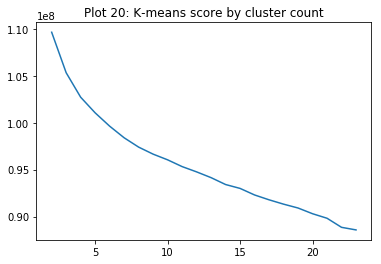

In [27]:
# Investigate the change in within-cluster distance across number of clusters.

lists = sorted(scores.items())
x, y = zip(*lists) 
plt.title('Plot 20: K-means score by cluster count')
plt.plot(x, y)
plt.show()

In [28]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_final = KMeans(n_clusters=12)
model_final = kmeans_final.fit(azdias_tran)


### Run this to create final clustering model

In [29]:
pop_clust = model_final.predict(azdias_tran)

### Discussion 3.1: Apply Clustering to General Population
Although the 'elbow' of the curve in Plot 20 is not as pronounced as the 'Elbow method' described by in Lesson 1.8, there is a visible decline in the slope of the curve around k=8.  

I originally tried to segment the population into eight clusters.  However, the resulting clusters were not able to adequately distinguish the general population data from the customers data.  I interpreted this fact to mean that the eight clusters were not carving off useful chunks of the population.  After increasing the cluster count to 12, the customer data clusters developed distinct characteristics from the population data.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [30]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';') 

In [31]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

#clean
customers_clean = clean_data(customers, inplace = False)




/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
#add any columns the one-hot might have missed
for i in set(azdias_final2.columns) - set(customers_clean.columns):
    customers_clean[i] = 0

In [33]:
set(customers_clean.columns) - set(azdias_final2.columns)

set()

In [34]:
#remove nan
customers_final = imputer.transform(customers_clean)

In [35]:
#scale
customers_final = scaler.transform(customers_final)


In [36]:
#apply PCA transformation
customers_trans = pca.transform(customers_final)

#predict with clustering
customers_clust = model_final.predict(customers_trans)


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [37]:
pop_metrics = np.bincount(pop_clust)
cust_metrics = np.bincount(customers_clust)

pop_clust_counts = {}
cust_clust_counts = {}
deltas = {}

missing_pop = len(azdias) - len(azdias_final)
missing_cust = len(customers) - len(customers_clean)

pop_clust_counts[-1] = missing_pop * 100 / (len(pop_clust) + missing_pop)
cust_clust_counts[-1] = missing_cust * 100 / (len(customers_clust) + missing_cust)

for i in range(0, 12):
    pop_clust_counts[i] = pop_metrics[i] * 100 / (len(pop_clust) + missing_pop)
    cust_clust_counts[i] = cust_metrics[i] * 100 / (len(customers_clust) + missing_cust)
    deltas[i] = cust_clust_counts[i] - pop_clust_counts[i]

#append the missing or imcomplete data to a cluster[-1]


    
print("Customers")
for i in cust_clust_counts:
    print(str(i) + " : " + str(cust_clust_counts[i]))
print("Population")
for i in pop_clust_counts:
    print(str(i) + " : " + str(pop_clust_counts[i]))    
print("Difference")
for i in deltas:
    print(str(i) + " : " + str(deltas[i]))

Customers
-1 : 29.642268277920397
0 : 7.36125894851
1 : 0.138793229395
2 : 4.37042138877
3 : 37.4647799136
4 : 3.09362803415
5 : 6.97827312003
6 : 0.102268695344
7 : 0.0240018366623
8 : 1.50115834951
9 : 4.51391062968
10 : 0.0897459979546
11 : 4.71949157849
Population
-1 : 16.169277878326476
0 : 0.646192134162
1 : 8.46939199144
2 : 3.94694469722
3 : 10.0371288379
4 : 14.6034485274
5 : 11.770593377
6 : 8.61021003769
7 : 6.503437419
8 : 0.355467386877
9 : 11.8467809892
10 : 5.76647094267
11 : 1.27465578123
Difference
0 : 6.71506681435
1 : -8.33059876204
2 : 0.423476691548
3 : 27.4276510757
4 : -11.5098204932
5 : -4.79232025692
6 : -8.50794134235
7 : -6.47943558234
8 : 1.14569096263
9 : -7.33287035954
10 : -5.67672494472
11 : 3.44483579726


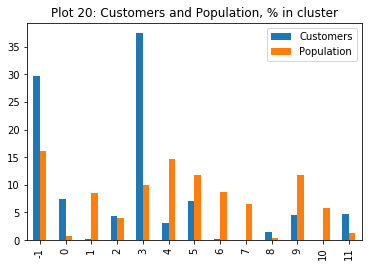

In [38]:
results_dict = {'Customers' : cust_clust_counts, 'Population' : pop_clust_counts}
pd.DataFrame(results_dict).plot(kind='bar')
plt.title('Plot 20: Customers and Population, % in cluster')
plt.show()

In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

This analysis will consider clusters which are noticeably over- or under- represented in the customer population:

Over-represented:
Clusters 3

Under-represented:
Clusters 6, 7

In [39]:
#Principal components by cluster: Overrepresented
centers = {}
smallest_pc = {}
largest_pc = {}
pcs = {}
for i in [3]:
    centers[i] = {k: v for k, v in enumerate(model_final.cluster_centers_[i])}
    smallest_pc[i] = sorted(centers[i].items(), key=lambda kv: kv[1])[:5]
    largest_pc[i] = sorted(centers[i].items(), key=lambda kv: kv[1], reverse=True)[:5]    
    print("--- Principal Components in Cluster " + str(i))
    for k,v in smallest_pc[i]:
        print("   Component " + str(k) + " : " + str(v))
    for k,v in largest_pc[i]:
        print("   Component " + str(k) + " : " + str(v))


--- Principal Components in Cluster 3
   Component 0 : -4.21947397725
   Component 11 : -0.67241864244
   Component 12 : -0.60970011629
   Component 13 : -0.46454925644
   Component 5 : -0.452308408145
   Component 3 : 2.64933500781
   Component 1 : 0.87816521323
   Component 17 : 0.725934793909
   Component 2 : 0.718283944746
   Component 92 : 0.206530750551


This cluster is positively correlated to principal component 3, and negatively correlated to 0.  

In [41]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#Principal components by cluster: Underrepresented
centers2 = {}
smallest_pc2 = {}
largest_pc2 = {}
pcs2 = {}
for i in [6, 7]:
    centers2[i] = {k: v for k, v in enumerate(model_final.cluster_centers_[i])}
    smallest_pc2[i] = sorted(centers2[i].items(), key=lambda kv: kv[1])[:5]
    largest_pc2[i] = sorted(centers2[i].items(), key=lambda kv: kv[1], reverse=True)[:5]    
    print("--- Principal Components in Cluster " + str(i))
    for k,v in smallest_pc2[i]:
        print("   Component " + str(k) + " : " + str(v))
    for k,v in largest_pc2[i]:
        print("   Component " + str(k) + " : " + str(v))


--- Principal Components in Cluster 6
   Component 2 : -2.61202158791
   Component 1 : -1.74096744602
   Component 16 : -0.51523482385
   Component 11 : -0.469870623601
   Component 20 : -0.250477907
   Component 0 : 5.18968921939
   Component 3 : 0.670885542993
   Component 9 : 0.520710508888
   Component 7 : 0.341784951462
   Component 21 : 0.312282303367
--- Principal Components in Cluster 7
   Component 1 : -2.37403454193
   Component 8 : -0.607481221
   Component 9 : -0.395821058943
   Component 25 : -0.35969964981
   Component 3 : -0.326677236751
   Component 0 : 5.13263361242
   Component 2 : 2.68584879467
   Component 15 : 0.455923510193
   Component 7 : 0.450887312636
   Component 16 : 0.345301790439


These clusters are positively correalted to component 0 and negatively to 1.  2 is contradictory.

Examining the most strongly correlated principal components:

Components positively correlated to overrepresented clusters: 3
Components negatively correlated to overrepresented clusters: 0

Components positively correlated to underrepresented clusters: 0
Components negatively correlated to underrepresented clusters: 1

Components indicative of a customer: 1, 3
Components indicative of not a customer: 0


### Attributes Indicative of a customer
Components 1, 3

In [42]:
component_weights(azdias_pca, 1)

,0
PRAEGENDE_JUGENDJAHRE_decade,-0.229799
ALTERSKATEGORIE_GROB,0.225836
FINANZ_SPARER,-0.217701
SEMIO_REL,-0.211450
FINANZ_UNAUFFAELLIGER,-0.210994
FINANZ_VORSORGER,0.210284
SEMIO_TRADV,-0.203926
SEMIO_PFLICHT,-0.200462
FINANZ_ANLEGER,-0.199992
ZABEOTYP_3,0.199909


In [43]:
component_weights(azdias_pca, 3)


,0
PRAEGENDE_JUGENDJAHRE_mov,0.325358
GREEN_AVANTGARDE,0.325241
LP_STATUS_FEIN_10.0,0.236743
EWDICHTE,0.225407
ORTSGR_KLS9,0.217379
KKK,-0.216798
HH_EINKOMMEN_SCORE,-0.200759
BALLRAUM,-0.195385
INNENSTADT,-0.185016
LP_STATUS_FEIN_4.0,-0.160366


### Attributes indicating not a customer

In [44]:
component_weights(azdias_pca, 0)

,0
MOBI_REGIO,-0.209920
FINANZ_MINIMALIST,-0.200107
KBA05_ANTG1,-0.196197
PLZ8_ANTG1,-0.192882
PLZ8_ANTG3,0.191278
PLZ8_ANTG4,0.187047
KBA05_GBZ,-0.186443
HH_EINKOMMEN_SCORE,0.185303
CAMEO_INTL_2015_family,0.184495
PLZ8_BAUMAX,0.184064


### Discussion 3.3: Compare Customer Data to Demographics Data

Examining the aggregate of the values in the above components (and considering the negative and positive correlation with clusters, which are negatively or positively correlated with number of customers), the following attributes are indicative of a customer:
 
- PRAEGENDE_JUGENDJAHRE_mov - avant garde youth social movement
- GREEN_AVANTGARDE - associated with environmental movement 
- LP_STATUS_FEIN_10.0 - social status: top earners
- ALTERSKATEGORIE_GROB - estimated age, older
- EWDICHTE - high density of households
- ORTSGR_KLS9 - large community
- FINANZ_VORSORGER - low afinity for "be prepared" financial type
- MOBI_REGIO - low movement
- FINANZ_MINIMALIST - low afinity for minimalist financial type
- ZABEOTYP_3 - energy consumpteion - fiar supplied



The following attributes are negatively correlated with the customer base:

- PRAEGENDE_JUGENDJAHRE_decade - younger youth movement
- FINANZ_SPARER - low affinity for saver financial type
- KKK - low purchasing power in region
- SEMIO_REL - low afinity for religious personality type
- FINANZ_UNAUFFAELLIGER - low afinity for inconspicuous finance type
- SEMIO_TRADV - low afinity for traditional values
- HH_EINKOMMEN_SCORE - low household income
- SEMIO_PFLICHT - low afinity for dutiful personality type
- FINANZ_ANLEGER - low afinity for investor finance type
- BALLRAUM - far from urban center


The customer base appears to have the follwing characteristics:
- Urban
- Wealthy
- Older
- Environmentally conscious
- Financially savers and investors



> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.